# Nearest Neighbor

Nearest Neighbor is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). It is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation.



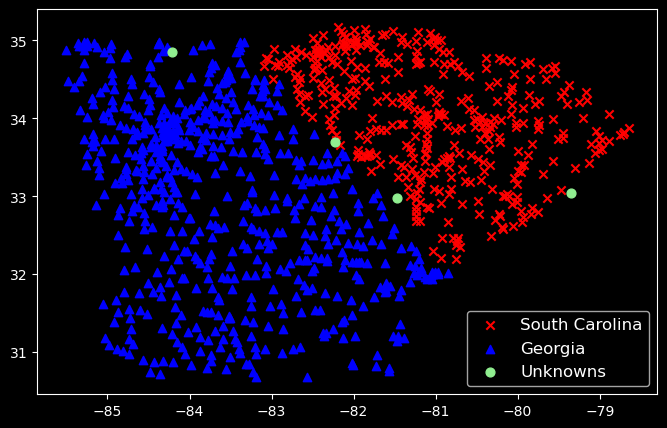

In [13]:
# import libraries
from matplotlib import pyplot as plt 
import pandas as pd

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(8, 5))

url  = 'https://raw.githubusercontent.com/fahadsultan/csc343/refs/heads/main/data/uscities.csv'
data = pd.read_csv(url)
us_mainland = data[(data['state_id'] != 'HI') & \
                   (data['state_id'] != 'AK') & \
                   (data['state_id'] != 'PR')]

sc = us_mainland[us_mainland['state_id'] == 'SC']
ga = us_mainland[us_mainland['state_id'] == 'GA']

unknown1 = (33.04366363086289, -79.34728514760124)
unknown2 = (33.69266640894652, -82.22939618795743)
unknown3 = (32.9806084015696,  -81.46763167425789)
unknown4 = (34.84821943641973, -84.2073074091929)

ax.scatter(sc['lng'], sc['lat'], label='South Carolina', color='red',  marker='x');
ax.scatter(ga['lng'], ga['lat'], label='Georgia',        color='blue', marker='^');
ax.scatter(unknown1[1], unknown1[0], s=40, label='Unknowns', color='lightgreen');
ax.scatter(unknown2[1], unknown2[0], s=40, color='lightgreen');
ax.scatter(unknown3[1], unknown3[0], s=40, color='lightgreen');
ax.scatter(unknown4[1], unknown4[0], s=40, color='lightgreen');
ax.legend(fontsize=12);

The algorithm is composed of two stages:

1. Training stage: The algorithm stores all the training data.

2. Testing stage: The algorithm compares the test data with the training data and returns the most similar data.

The algorithm is based on the assumption that the data points that are close to each other are similar. The similarity is calculated using a distance function, such as Euclidean distance, Manhattan distance, Minkowski distance, etc.

The algorithm is simple and easy to implement, but it is computationally expensive, especially when the training data is large. It is also sensitive to the curse of dimensionality, which means that the algorithm's performance deteriorates as the number of dimensions increases.

In this notebook, we will implement the Nearest Neighbor algorithm from scratch and apply it to a simple classification problem. We will use the Iris dataset, which is a popular dataset for classification tasks. The dataset contains 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The goal is to classify the flowers into three classes: setosa, versicolor, and virginica.

Let's start by loading the dataset and exploring its contents.
